In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

# Figure 3.1

In [3]:
independent_runs = ['independent_magnetization_p=0.3_q=4_a=0.6_b=0.3_c=0.05_d=0.05_h=0.75.pkl']

In [4]:
for magnetization in independent_runs:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)

In [5]:
column_average = [sum(y) / len(y) for y in zip(*x)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


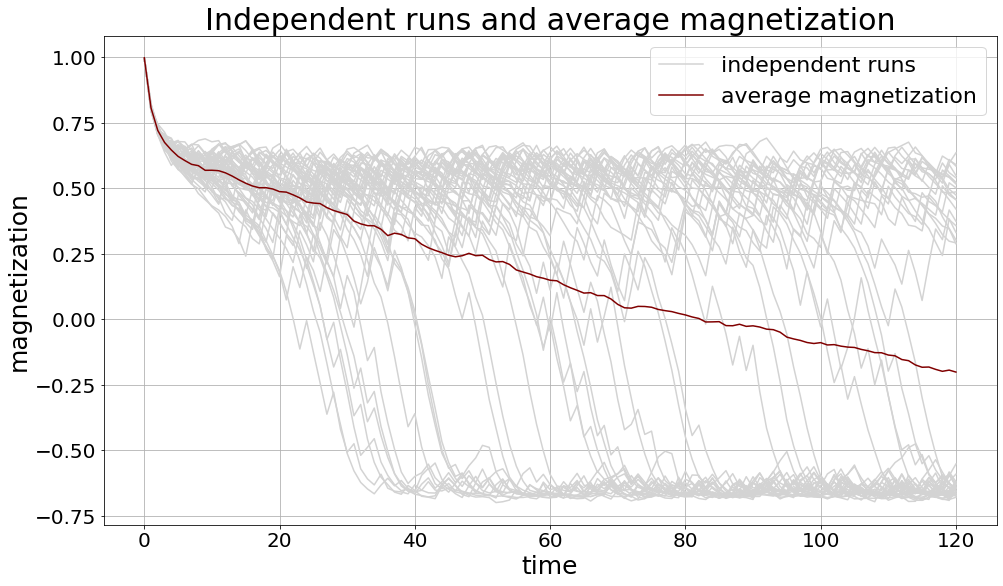

In [6]:
plt.figure(figsize=(16, 9))
for i in range(len(x)):
    if i == 0:
        plt.plot(x[i], color='lightgrey', label='independent runs')
    else:
        plt.plot(x[i], color='lightgrey')
plt.plot(column_average, color='maroon', label='average magnetization')
plt.legend(prop={'size': 22})
plt.title('Independent runs and average magnetization', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure3_1.eps', format='eps')

# Figure 3.2

In [7]:
values_plots = ['magnetization_p=0.25_q=4_a=0.4_b=0.4_c=0.1_d=0.1_h=0.5.pkl',
 'magnetization_p=0.3_q=4_a=0.25_b=0.7_c=0.025_d=0.025_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.15_b=0.5_c=0.3_d=0.05_h=0.75.pkl',
 'magnetization_p=0.15_q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.75.pkl',
 'magnetization_p=0.08_q=4_a=0.2_b=0.7_c=0.05_d=0.05_h=0.75.pkl',
 'magnetization_p=0.3_q=4_a=0.4_b=0.2_c=0.2_d=0.2_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.1_b=0.8_c=0.05_d=0.05_h=0.25.pkl',
 'magnetization_p=0.25_q=4_a=0.3_b=0.4_c=0.2_d=0.1_h=0.25.pkl',
 'magnetization_p=0.3_q=4_a=0.7_b=0.15_c=0.05_d=0.1_h=0.75.pkl',
 'magnetization_p=0.07_q=4_a=0.4_b=0.4_c=0.1_d=0.1_h=0.25.pkl',
 'magnetization_p=0.01_q=4_a=0.3_b=0.6_c=0.05_d=0.05_h=0.75.pkl',
 'magnetization_p=0.5_q=4_a=0.4_b=0.2_c=0.2_d=0.2_h=0.5.pkl']

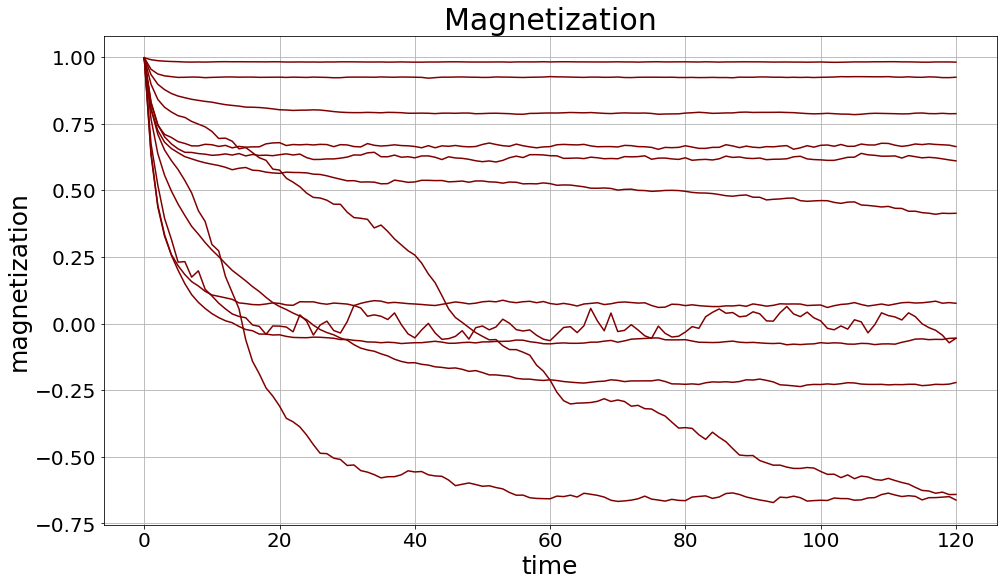

In [8]:
plt.figure(figsize=(16, 9))
for magnetization in values_plots:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
    plt.plot(x, color='maroon')
plt.title('Magnetization', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time', fontsize=25)
plt.ylabel('magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure3_2.eps', format='eps')

# Figure 3.3

In [9]:
def plot_magnetizations(magnetizations, condition=None, legend=True):
    plt.figure(figsize=(16, 9))
    for magnetization in magnetizations:
        with open(magnetization, 'rb') as f:
            x = pickle.load(f)
        magnetization = magnetization.replace(condition, '')
        magnetization = magnetization.replace('magnetization_', '').replace('_', ' ').replace('.pkl', '')
        plt.plot(x, label=magnetization)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('time', fontsize=25)
    plt.ylabel('magnetization', fontsize=25)
    plt.grid()
    if legend: plt.legend(prop={'size': 20})
    if condition: plt.title(condition.replace('_', ' '), fontsize=28)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


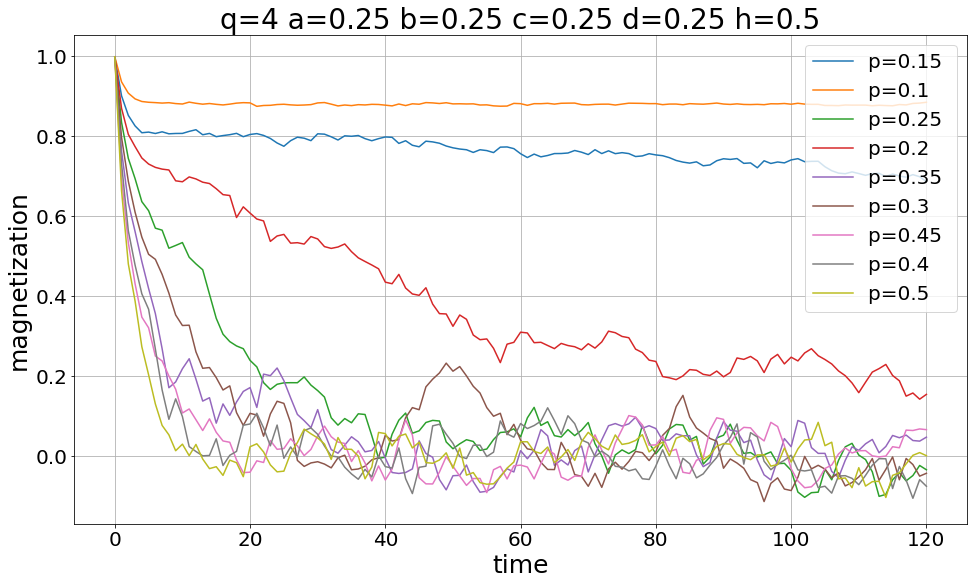

In [10]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]

plot_magnetizations(values, condition, True)
plt.savefig(r'plots\figure3_3.eps', format='eps')

# Figure 3.4

In [11]:
magnetizations = [pkl for pkl in os.listdir() if pkl[-4:] == '.pkl']

condition = 'q=4_a=0.25_b=0.25_c=0.25_d=0.25_h=0.5'
values = [magn for magn in magnetizations if (condition in magn and 'p=0.0' not in magn)]
values = [magn for magn in magnetizations if (condition in magn)]

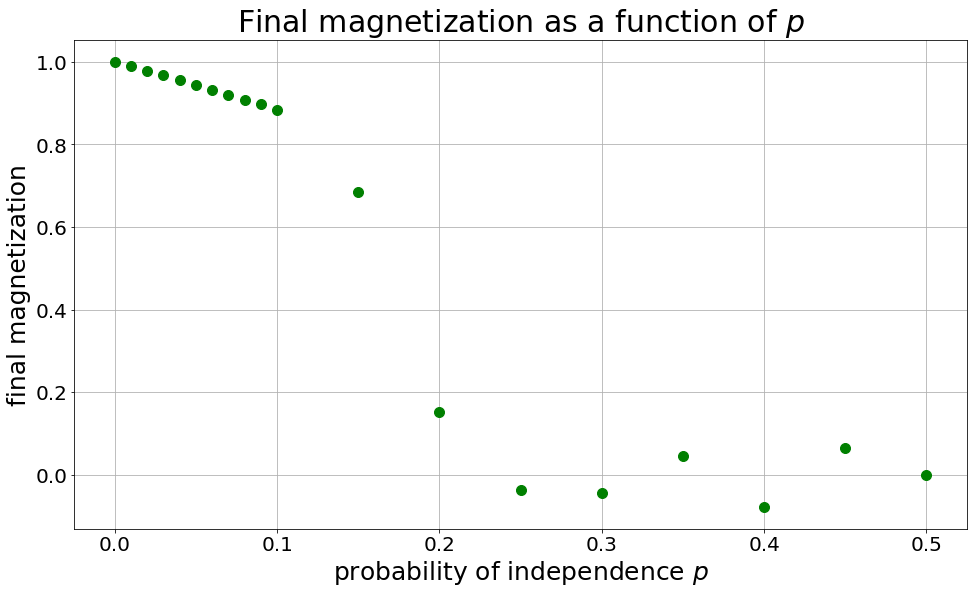

In [12]:
plt.figure(figsize=(16, 9))
for magnetization in values:
    with open(magnetization, 'rb') as f:
        x = pickle.load(f)
        p = float(magnetization.split('p=')[1].split('_q')[0])
        plt.plot(p, x[-1], '.', color='green', markersize=20)
plt.title('Final magnetization as a function of $p$', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('probability of independence $p$', fontsize=25)
plt.ylabel('final magnetization', fontsize=25)
plt.grid()
plt.savefig(r'plots\figure3_4.eps', format='eps')    